In [1]:
# importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# import all required packages 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix,classification_report 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [3]:
#to load the dataset
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# checking rows and columns
df.shape

(284807, 31)

In [5]:
# checking info datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

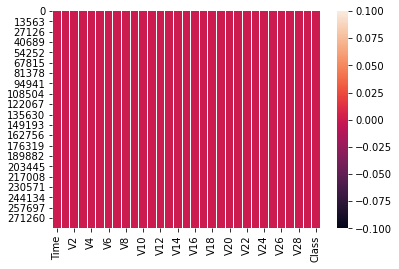

In [6]:
# heatmap for visualize & checking null values in dataset
sns.heatmap(df.isnull())
plt.show()

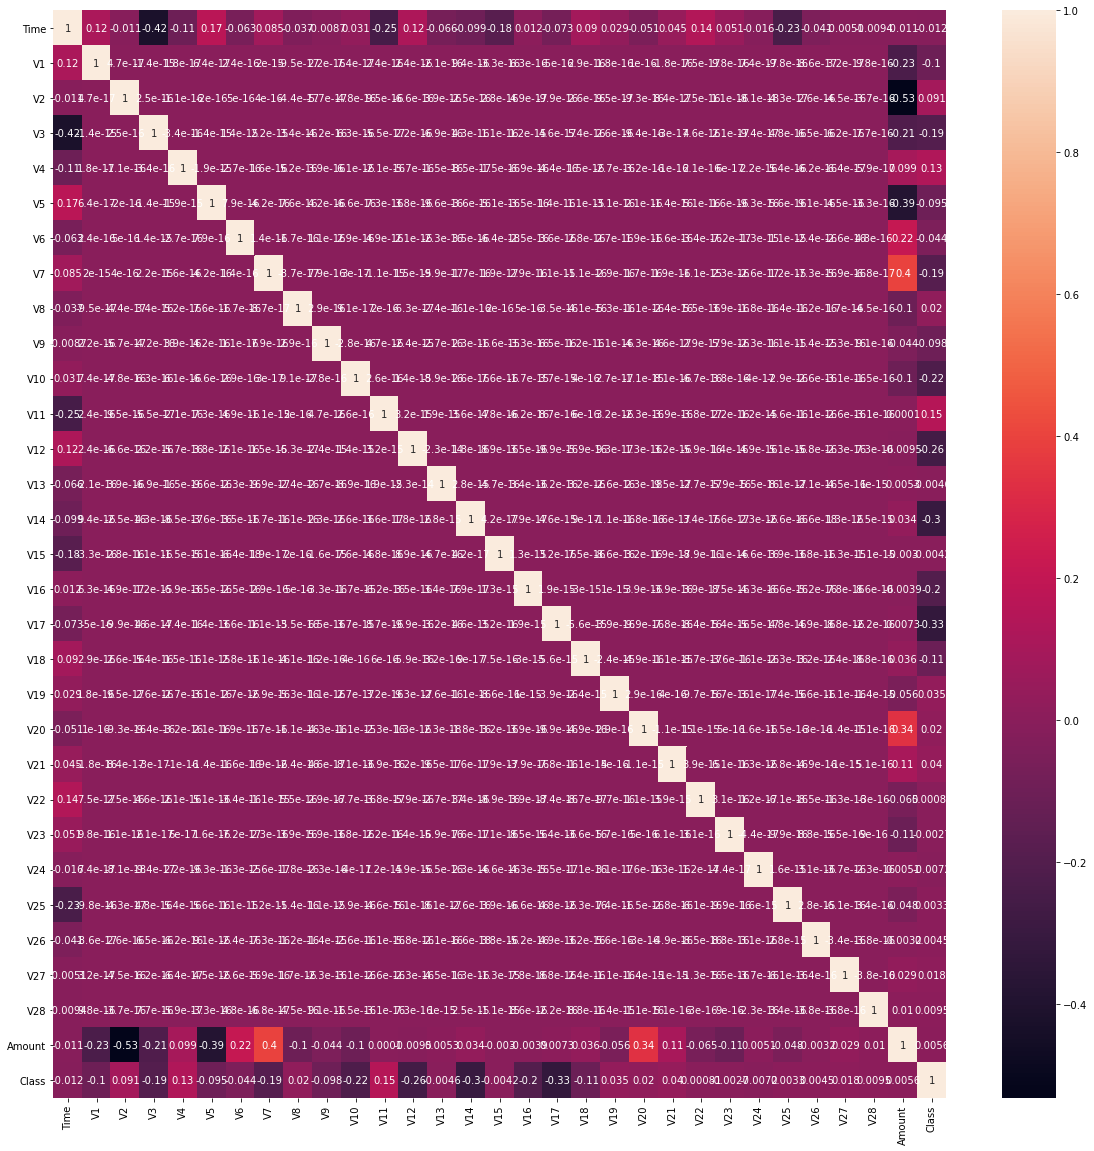

In [7]:
# heatmap correlations 
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()


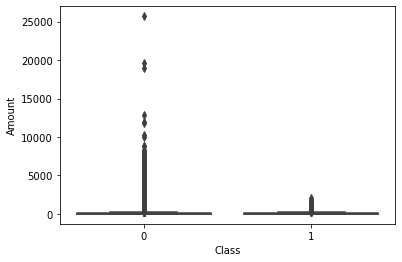

In [8]:
sns.boxplot(data=df,x="Class",y="Amount")
plt.show()

In [9]:
#create a function
def create_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test,y_pred))
    print("confusion_matrix")
    print(confusion_matrix(y_test,y_pred))
    return model

In [10]:
x=df.drop("Class",axis=1) #select all input features except class
y=df["Class"] #select output 

In [11]:
#Train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [12]:
# create object of Logistic Regression class
lr=LogisticRegression() 

In [13]:
#call create_model()
lr=create_model(lr) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.71      0.62      0.66       135

    accuracy                           1.00     85443
   macro avg       0.85      0.81      0.83     85443
weighted avg       1.00      1.00      1.00     85443

confusion_matrix
[[85273    35]
 [   51    84]]


In [14]:
#Create the object of DecisionTreeClassifier  class for gini index
dt=DecisionTreeClassifier()

In [15]:
#call create_model()
dt=create_model(dt) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.71      0.73      0.72       135

    accuracy                           1.00     85443
   macro avg       0.85      0.86      0.86     85443
weighted avg       1.00      1.00      1.00     85443

confusion_matrix
[[85267    41]
 [   37    98]]


In [16]:
#Create the object of DecisionTreeClassifier  class for gini index 
# purning technique max_depth
dt=DecisionTreeClassifier(max_depth=5)

In [17]:
#call create_model()
dt=create_model(dt) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.89      0.72      0.80       135

    accuracy                           1.00     85443
   macro avg       0.94      0.86      0.90     85443
weighted avg       1.00      1.00      1.00     85443

confusion_matrix
[[85296    12]
 [   38    97]]


In [18]:
dt=DecisionTreeClassifier(min_samples_leaf=45)#Create the object of DecisionTreeClassifier  class for gini index 
# purning technique min_samples_leaf

In [19]:
#call create_model()
dt=create_model(dt) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.89      0.63      0.74       135

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.87     85443
weighted avg       1.00      1.00      1.00     85443

confusion_matrix
[[85297    11]
 [   50    85]]


In [20]:
dt=DecisionTreeClassifier(criterion="entropy")
#Create the object of DecisionTreeClassifier  class for entropy 


In [21]:
#call create_model()
dt=create_model(dt) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.73      0.73      0.73       135

    accuracy                           1.00     85443
   macro avg       0.87      0.87      0.87     85443
weighted avg       1.00      1.00      1.00     85443

confusion_matrix
[[85272    36]
 [   36    99]]


In [22]:
dt=DecisionTreeClassifier(criterion="entropy",max_depth=5)#Create the object of DecisionTreeClassifier  class for entropy 
# purning technique max_depth

In [23]:
#call create_model()
dt=create_model(dt) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.90      0.70      0.79       135

    accuracy                           1.00     85443
   macro avg       0.95      0.85      0.89     85443
weighted avg       1.00      1.00      1.00     85443

confusion_matrix
[[85297    11]
 [   40    95]]


In [24]:
dt=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=45)#Create the object of DecisionTreeClassifier  class for entropy 
# purning technique min_samples_leaf

In [25]:
#call create_model()
dt=create_model(dt) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.88      0.68      0.77       135

    accuracy                           1.00     85443
   macro avg       0.94      0.84      0.88     85443
weighted avg       1.00      1.00      1.00     85443

confusion_matrix
[[85295    13]
 [   43    92]]


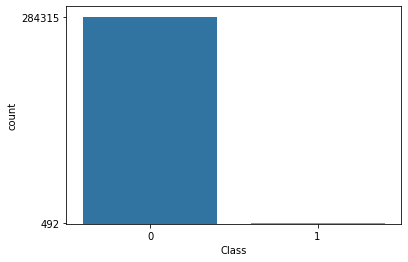

In [26]:
#BARGRAPH
sns.countplot(data=df,x="Class")
c=df["Class"].value_counts()
plt.yticks(c)
plt.show()

In [27]:
# calling imblearn package for RandomUnderSampler & RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [28]:
#create object of  RandomOverSampler() class
ros=RandomOverSampler()

In [29]:
#create object of RandomUnderSampler class
rus=RandomUnderSampler()

In [30]:

x=df.drop("Class",axis=1) #input variable
y=df["Class"] #out variable

In [31]:
#before apply randomoversampler
pd.Series(y_train).value_counts()#check if not balance

0    199007
1       357
Name: Class, dtype: int64

In [32]:
#apply randomoversampling for balance
x_train1,y_train1=ros.fit_resample(x_train,y_train)

In [33]:
#after apply randomoversampler
pd.Series(y_train1).value_counts()

1    199007
0    199007
Name: Class, dtype: int64

In [34]:
# create object for LogisticRegression 
lr=LogisticRegression()

In [35]:
#Train the model
lr.fit(x_train1,y_train1)

LogisticRegression()

In [36]:
#before apply randomoversampler
pd.Series(y_test).value_counts()#check if not balance

0    85308
1      135
Name: Class, dtype: int64

In [37]:
#apply randomoversampling for balance
x_test1,y_test1=ros.fit_resample(x_test,y_test)

In [38]:
#after apply randomoversampler
pd.Series(y_test1).value_counts() #check if not balance

1    85308
0    85308
Name: Class, dtype: int64

In [39]:
#Test the model
lr=LogisticRegression() 

In [40]:
#train the model
lr.fit(x_test1,y_test1)

LogisticRegression()

In [41]:
#Test the model
y_pred=lr.predict(x_test1)

In [42]:
# checking for classification report 
print(classification_report(y_pred,y_test1))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     90772
           1       0.88      0.94      0.90     79844

    accuracy                           0.91    170616
   macro avg       0.91      0.91      0.91    170616
weighted avg       0.91      0.91      0.91    170616



In [43]:
#create object
dtc=DecisionTreeClassifier(max_depth=5) 

In [44]:
# train the model
dtc.fit(x_train1,y_train1)

DecisionTreeClassifier(max_depth=5)

In [45]:
#create object
dtc=DecisionTreeClassifier(max_depth=5) 

In [46]:
dtc.fit(x_test1,y_test1)

DecisionTreeClassifier(max_depth=5)

In [47]:
#test the model
y_pred=dtc.predict(x_test1)

In [48]:
# checking for classification report 
print(classification_report(y_pred,y_test1) )

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     85572
           1       0.99      0.99      0.99     85044

    accuracy                           0.99    170616
   macro avg       0.99      0.99      0.99    170616
weighted avg       0.99      0.99      0.99    170616



In [49]:
#create object
dtc=DecisionTreeClassifier(min_samples_leaf=45) 

In [50]:
# train the model
dtc.fit(x_train1,y_train1)

DecisionTreeClassifier(min_samples_leaf=45)

In [51]:
#create object
dtc=DecisionTreeClassifier(min_samples_leaf=45) 

In [52]:
dtc.fit(x_test1,y_test1)

DecisionTreeClassifier(min_samples_leaf=45)

In [53]:
#Test the model
y_pred=dtc.predict(x_test1)

In [54]:
# checking for classification report 
print(classification_report(y_pred,y_test1) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85098
           1       1.00      1.00      1.00     85518

    accuracy                           1.00    170616
   macro avg       1.00      1.00      1.00    170616
weighted avg       1.00      1.00      1.00    170616



In [55]:
#create object
dtc=DecisionTreeClassifier(min_samples_leaf=45,criterion="entropy") 

In [56]:
# train the model
dtc.fit(x_train1,y_train1)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=45)

In [57]:
#create object
dtc=DecisionTreeClassifier(min_samples_leaf=45,criterion="entropy") 

In [58]:
dtc.fit(x_test1,y_test1)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=45)

In [59]:
#Test the model
y_pred=dtc.predict(x_test1)

In [60]:
# checking for classification report 
print(classification_report(y_pred,y_test1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85160
           1       1.00      1.00      1.00     85456

    accuracy                           1.00    170616
   macro avg       1.00      1.00      1.00    170616
weighted avg       1.00      1.00      1.00    170616



In [61]:
#create object
dtc=DecisionTreeClassifier(max_depth=5,criterion="entropy") 

In [62]:
# train the model
dtc.fit(x_train1,y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [63]:
#create object
dtc=DecisionTreeClassifier(max_depth=5,criterion="entropy") 

In [64]:
dtc.fit(x_test1,y_test1)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [65]:
#Test the model
y_pred=dtc.predict(x_test1)

In [66]:
# checking for classification report 
print(classification_report(y_pred,y_test1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     84015
           1       1.00      0.99      0.99     86601

    accuracy                           0.99    170616
   macro avg       0.99      0.99      0.99    170616
weighted avg       0.99      0.99      0.99    170616



In [67]:
#before apply randomundersampler
pd.Series(y_train).value_counts() #check if not balance 

0    199007
1       357
Name: Class, dtype: int64

In [68]:
#apply randomundersampling for balance
x_train2,y_train2=rus.fit_resample(x_train,y_train)

In [69]:
# train the sample
lr.fit(x_train2,y_train2)

LogisticRegression()

In [70]:
#after apply randomundersampler
pd.Series(y_train2).value_counts()#check if not balance 

1    357
0    357
Name: Class, dtype: int64

In [71]:
#before apply randomundersampler
pd.Series(y_test).value_counts()#check if not balance 

0    85308
1      135
Name: Class, dtype: int64

In [72]:
#apply randomundersampling for balance
x_test2,y_test2=rus.fit_resample(x_test,y_test)

In [73]:
lr.fit(x_test2,y_test2)

LogisticRegression()

In [74]:
#Test the model
y_pred1=lr.predict(x_test2)

In [75]:
# checking for classification report 
print(classification_report(y_pred1,y_test2) )

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       140
           1       0.92      0.95      0.94       130

    accuracy                           0.94       270
   macro avg       0.94      0.94      0.94       270
weighted avg       0.94      0.94      0.94       270



In [76]:
#create object of dtc max_depth
dtc=DecisionTreeClassifier(max_depth=5) 

In [77]:
# train the model
dtc.fit(x_train2,y_train2)

DecisionTreeClassifier(max_depth=5)

In [78]:
#create object of dtc max_depth
dtc=DecisionTreeClassifier(max_depth=5) 

In [79]:
# test the model
dtc.fit(x_test2,y_test2)

DecisionTreeClassifier(max_depth=5)

In [80]:
#Test the model
y_pred1=dtc.predict(x_test2)

In [81]:
# checking for classification report 
print(classification_report(y_pred1,y_test2))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       136
           1       0.99      1.00      1.00       134

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



In [82]:
#create object
dtc=DecisionTreeClassifier(min_samples_leaf=45) 

In [83]:
# train the model
dtc.fit(x_train2,y_train2)

DecisionTreeClassifier(min_samples_leaf=45)

In [84]:
#create object
dtc=DecisionTreeClassifier(min_samples_leaf=45) 

In [85]:
dtc.fit(x_test2,y_test2)

DecisionTreeClassifier(min_samples_leaf=45)

In [86]:
#Test the model
y_pred1=dtc.predict(x_test2)

In [87]:
# checking for classification report 
print(classification_report(y_pred1,y_test2))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       149
           1       0.87      0.97      0.91       121

    accuracy                           0.92       270
   macro avg       0.92      0.92      0.92       270
weighted avg       0.92      0.92      0.92       270



In [88]:
#create object
dtc=DecisionTreeClassifier(min_samples_leaf=45,criterion="entropy") 

In [89]:
# train the model
dtc.fit(x_train2,y_train2)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=45)

In [90]:
#create object
dtc=DecisionTreeClassifier(min_samples_leaf=45,criterion="entropy")

In [91]:
dtc.fit(x_test2,y_test2)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=45)

In [92]:
#Test the model
y_pred1=dtc.predict(x_test2)

In [93]:
# checking for classification report 
print(classification_report(y_pred1,y_test2))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       149
           1       0.87      0.97      0.91       121

    accuracy                           0.92       270
   macro avg       0.92      0.92      0.92       270
weighted avg       0.92      0.92      0.92       270



In [94]:
#create object
dtc=DecisionTreeClassifier(max_depth=5,criterion="entropy") 

In [95]:
# train the model
dtc.fit(x_train2,y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [96]:
#create object
dtc=DecisionTreeClassifier(max_depth=5,criterion="entropy")

In [97]:
dtc.fit(x_test2,y_test2)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [98]:
#Test the model
y_pred1=dtc.predict(x_test2)

In [99]:
# checking for classification report 
print(classification_report(y_pred1,y_test2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       135

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



In [100]:
#after appling both the sampling techniques RandomoverSampler is best for these these dataset 

In [101]:
#creating function
def create_model(model):
    model.fit(x_train1,y_train1)
    y_pred=model.predict(x_test1)
    print(classification_report(y_test1,y_pred))
    print("confusion_matrix")
    print(confusion_matrix(y_test1,y_pred))
    return model

In [102]:
# create object for logisticregression 
lr=LogisticRegression() 

In [103]:
#calling create_model
lr=create_model(lr) 

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     85308
           1       0.97      0.88      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

confusion_matrix
[[82868  2440]
 [10033 75275]]


In [104]:
# create object for DecisionTreeClassifier 
dt=DecisionTreeClassifier()

In [105]:
# create object
dt=create_model(dt) 

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     85308
           1       1.00      0.67      0.80     85308

    accuracy                           0.83    170616
   macro avg       0.88      0.83      0.83    170616
weighted avg       0.88      0.83      0.83    170616

confusion_matrix
[[85261    47]
 [28184 57124]]


In [106]:
# create object for DecisionTreeClassifier gini index
dt=DecisionTreeClassifier(max_depth=5)

In [107]:
# calling create_model
dt=create_model(dt) 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     85308
           1       0.99      0.83      0.91     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

confusion_matrix
[[84785   523]
 [14367 70941]]


In [108]:
# create object for DecisionTreeClassifier gini index
dt=DecisionTreeClassifier(min_samples_leaf=45)

In [109]:
# calling create_model
dt=create_model(dt) 

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     85308
           1       1.00      0.81      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.92      0.90      0.90    170616
weighted avg       0.92      0.90      0.90    170616

confusion_matrix
[[85119   189]
 [16258 69050]]


In [110]:
# create object for DecisionTreeClassifier entropy
dt=DecisionTreeClassifier(criterion="entropy",max_depth=5)

In [111]:
# calling create_model
dt=create_model(dt) 

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     85308
           1       0.97      0.86      0.91     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

confusion_matrix
[[82690  2618]
 [11886 73422]]


In [112]:
# create object for DecisionTreeClassifier entropy
dt=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=45)

In [113]:
# calling create_model
dt=create_model(dt) 

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.80      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.92      0.90      0.90    170616
weighted avg       0.92      0.90      0.90    170616

confusion_matrix
[[85127   181]
 [16860 68448]]


In [114]:
# create object for linear supportvectormachine
dt=LinearSVC(random_state=1)

In [115]:
# calling create_model
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     85308
           1       0.97      0.79      0.87     85308

    accuracy                           0.88    170616
   macro avg       0.90      0.88      0.88    170616
weighted avg       0.90      0.88      0.88    170616

confusion_matrix
[[83112  2196]
 [17662 67646]]


In [116]:
# create object for linear supportvectormachine
#Soft Margin
#add some error on training time set error 0.01
dt=LinearSVC(random_state=1,C=0.01)

In [117]:
# calling create_model
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     85308
           1       0.98      0.79      0.87     85308

    accuracy                           0.88    170616
   macro avg       0.90      0.88      0.88    170616
weighted avg       0.90      0.88      0.88    170616

confusion_matrix
[[83886  1422]
 [18273 67035]]


In [118]:
# Naive aggregation
#importing class
from sklearn.ensemble import VotingClassifier 

In [119]:
# creating objects
lr=LogisticRegression()
dt=DecisionTreeClassifier(max_depth=5)
dte=DecisionTreeClassifier(max_depth=5,criterion="entropy")
dt1=DecisionTreeClassifier(min_samples_leaf=45)
dte1=DecisionTreeClassifier(min_samples_leaf=45,criterion="entropy")
lsvc=LinearSVC(random_state=1)
lsvc1=LinearSVC(random_state=1,C=0.01)


In [120]:
#create a model list 
#("model name",object of those model)
model_list=[("LogisticRegression",lr),("DecisionTreeClassifierMD",dt),("DecisionTreeClassifierentropyMD",dte),("DecisionTreeClassifierMSL",dt1),
           ("DecisionTreeClassifierentropyMSL",dte1),("LinearSVC",lsvc),("lSVC",lsvc1)]

In [121]:
#create the object of VotingClassifier class 
#bydefault use hardvoting 
vc=VotingClassifier(estimators=model_list) 

In [122]:
# calling create_model
vc=create_model(vc) 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     85308
           1       1.00      0.82      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

confusion_matrix
[[85121   187]
 [15038 70270]]


In [123]:
# creating objects
lr=LogisticRegression()
dt=DecisionTreeClassifier(max_depth=5)
dte=DecisionTreeClassifier(max_depth=5,criterion="entropy")
dt1=DecisionTreeClassifier(min_samples_leaf=45)
dte1=DecisionTreeClassifier(min_samples_leaf=45,criterion="entropy")


In [124]:
#create a model list 
#("model name",object of those model)
model_list=[("LogisticRegression",lr),("DecisionTreeClassifierMD",dt),("DecisionTreeClassifierentropyMD",dte),("DecisionTreeClassifierMSL",dt1),
           ("DecisionTreeClassifierentropyMSL",dte1)]

In [125]:
#create the object of VotingClassifier class 
#softvoting 
vc2=VotingClassifier(estimators=model_list,voting="soft")

In [126]:
# calling create_model
vc2=create_model(vc2) 

              precision    recall  f1-score   support

           0       0.84      1.00      0.92     85308
           1       1.00      0.82      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

confusion_matrix
[[85164   144]
 [15642 69666]]


In [127]:
# importing Bagginglassifier
from sklearn.ensemble import BaggingClassifier 

In [128]:
#Create object of BaggingClassifier class
bc=BaggingClassifier(LogisticRegression(),n_estimators=12,random_state=1) 

In [129]:
# calling create_model
bc=create_model(bc) 

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     85308
           1       0.98      0.85      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.92      0.92      0.92    170616
weighted avg       0.92      0.92      0.92    170616

confusion_matrix
[[83476  1832]
 [12504 72804]]


In [130]:
#Create object of BaggingClassifier class dtc gini index
bc=BaggingClassifier(DecisionTreeClassifier(),n_estimators=12,random_state=1) 

In [131]:
# calling create_model
bc=create_model(bc) 

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     85308
           1       1.00      0.78      0.88     85308

    accuracy                           0.89    170616
   macro avg       0.91      0.89      0.89    170616
weighted avg       0.91      0.89      0.89    170616

confusion_matrix
[[85268    40]
 [18772 66536]]


In [132]:
#Create object of BaggingClassifier class dtc gini index
bc=BaggingClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=12,random_state=1) 

In [133]:
# calling create_model
bc=create_model(bc) 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     85308
           1       0.99      0.83      0.91     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

confusion_matrix
[[84784   524]
 [14367 70941]]


In [134]:
#Create object of BaggingClassifier class dtc gini index
bc=BaggingClassifier(DecisionTreeClassifier(min_samples_leaf=45),n_estimators=12,random_state=1) 

In [135]:
# calling create_model
bc=create_model(bc) 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     85308
           1       1.00      0.82      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

confusion_matrix
[[85080   228]
 [15001 70307]]


In [136]:
#Create object of BaggingClassifier class dtc entropy
bc=BaggingClassifier(DecisionTreeClassifier(min_samples_leaf=45,criterion="entropy"),n_estimators=12,random_state=1) 

In [137]:
# calling create_model
bc=create_model(bc)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.80      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.92      0.90      0.90    170616
weighted avg       0.92      0.90      0.90    170616

confusion_matrix
[[85111   197]
 [16860 68448]]


In [138]:
#Create object of BaggingClassifier class entropy
bc=BaggingClassifier(DecisionTreeClassifier(max_depth=5,criterion="entropy"),n_estimators=12,random_state=1) 

In [139]:
# calling create_model
bc=create_model(bc)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     85308
           1       0.97      0.83      0.90     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616

confusion_matrix
[[83489  1819]
 [14409 70899]]


In [140]:
#Create object of BaggingClassifier class linear svm
bc=BaggingClassifier(LinearSVC(random_state=1),n_estimators=12,random_state=1) 

In [141]:
# calling create_model
bc=create_model(bc)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     85308
           1       0.97      0.79      0.87     85308

    accuracy                           0.88    170616
   macro avg       0.90      0.88      0.88    170616
weighted avg       0.90      0.88      0.88    170616

confusion_matrix
[[83149  2159]
 [17662 67646]]


In [142]:
#Create object of BaggingClassifier class pasting techniques LogisticRegression 
bc=BaggingClassifier(LogisticRegression(),n_estimators=12,random_state=1,bootstrap=False) 

In [143]:
# calling create_model
bc=create_model(bc)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     85308
           1       0.97      0.88      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

confusion_matrix
[[82868  2440]
 [10033 75275]]


In [144]:
#Create object of BaggingClassifier class pasting techniques dtc 
bc=BaggingClassifier(DecisionTreeClassifier(),n_estimators=12,random_state=1,bootstrap=False) 

In [145]:
# calling create_model
bc=create_model(bc)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     85308
           1       1.00      0.70      0.82     85308

    accuracy                           0.85    170616
   macro avg       0.88      0.85      0.85    170616
weighted avg       0.88      0.85      0.85    170616

confusion_matrix
[[85263    45]
 [25679 59629]]


In [146]:
#Create object of BaggingClassifier class pasting techniques dtc gini index
bc=BaggingClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=12,random_state=1,bootstrap=False) 

In [147]:
# calling create_model
bc=create_model(bc)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     85308
           1       0.99      0.83      0.91     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

confusion_matrix
[[84785   523]
 [14367 70941]]


In [148]:
#Create object of BaggingClassifier class pasting techniques dtc gini index
bc=BaggingClassifier(DecisionTreeClassifier(min_samples_leaf=45),n_estimators=12,random_state=1,bootstrap=False) 

In [149]:
# calling create_model
bc=create_model(bc)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     85308
           1       1.00      0.82      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

confusion_matrix
[[85121   187]
 [15642 69666]]


In [150]:
#Create object of BaggingClassifier class pasting techniques dtc entropy
bc=BaggingClassifier(DecisionTreeClassifier(min_samples_leaf=45,criterion="entropy"),n_estimators=12,random_state=1,bootstrap=False)

In [151]:
# calling create_model
bc=create_model(bc)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.80      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.92      0.90      0.90    170616
weighted avg       0.92      0.90      0.90    170616

confusion_matrix
[[85127   181]
 [16860 68448]]


In [152]:
#Create object of BaggingClassifier class pasting techniques dtc entropy
bc=BaggingClassifier(DecisionTreeClassifier(min_samples_leaf=5,criterion="entropy"),n_estimators=12,random_state=1,bootstrap=False)

In [153]:
# calling create_model
bc=create_model(bc)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     85308
           1       1.00      0.74      0.85     85308

    accuracy                           0.87    170616
   macro avg       0.90      0.87      0.87    170616
weighted avg       0.90      0.87      0.87    170616

confusion_matrix
[[85269    39]
 [21943 63365]]


In [154]:
#Create object of BaggingClassifier class linear svm 
bc=BaggingClassifier(LinearSVC(random_state=1),n_estimators=12,random_state=1,bootstrap=False) 

In [155]:
# calling create_model
bc=create_model(bc)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     85308
           1       0.96      0.79      0.87     85308

    accuracy                           0.88    170616
   macro avg       0.89      0.88      0.88    170616
weighted avg       0.89      0.88      0.88    170616

confusion_matrix
[[82695  2613]
 [17662 67646]]


In [156]:
#Random Forest Tree 
#call Random Forest Tree from package
from sklearn.ensemble import RandomForestClassifier

In [157]:
#Create the object of RandomForestClassifier class
rfc=RandomForestClassifier(n_estimators=10,max_features=10,random_state=1)

In [158]:
# calling create_model
model=create_model(rfc)

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     85308
           1       1.00      0.77      0.87     85308

    accuracy                           0.89    170616
   macro avg       0.91      0.89      0.88    170616
weighted avg       0.91      0.89      0.88    170616

confusion_matrix
[[85296    12]
 [19424 65884]]


In [159]:
#call StackingClassifier
from mlxtend.classifier import StackingClassifier

In [160]:
#create a model list
model_list=[lr,dt,dte,dt1,dte1,lsvc]

In [161]:
#Create the object of StackingClassifier class and passing the no. of arguments
sc=StackingClassifier(classifiers=model_list, meta_classifier=LogisticRegression()) 

In [162]:
# calling create_model
sc=create_model(sc)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.79      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616

confusion_matrix
[[85246    62]
 [17520 67788]]


In [163]:
#Create the object of StackingClassifier class and passing the no. of arguments
sc=StackingClassifier(classifiers=model_list,meta_classifier=DecisionTreeClassifier(max_depth=5)) 

In [164]:
# calling create_model
sc=create_model(sc)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.79      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616

confusion_matrix
[[85250    58]
 [17520 67788]]


In [165]:
#Create the object of StackingClassifier class and passing the no. of arguments
sc=StackingClassifier(classifiers=model_list,meta_classifier=DecisionTreeClassifier(min_samples_leaf=45)) 

In [166]:
# calling create_model
sc=create_model(sc)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.79      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616

confusion_matrix
[[85246    62]
 [17520 67788]]


In [167]:
#Create the object of StackingClassifier class and passing the no. of arguments
sc=StackingClassifier(classifiers=model_list,meta_classifier=DecisionTreeClassifier(min_samples_leaf=45,criterion="entropy")) 

In [168]:
# calling create_model
sc=create_model(sc)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.79      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616

confusion_matrix
[[85246    62]
 [17520 67788]]


In [169]:
#Create the object of StackingClassifier class and passing the no. of arguments
sc=StackingClassifier(classifiers=model_list,meta_classifier=DecisionTreeClassifier(max_depth=5,criterion="entropy")) 

In [170]:
# calling create_model
sc=create_model(sc)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.79      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616

confusion_matrix
[[85249    59]
 [17520 67788]]


In [171]:
#Create the object of StackingClassifier class and passing the no. of arguments
sc=StackingClassifier(classifiers=model_list,meta_classifier=LinearSVC(random_state=1)) 

In [172]:
# calling create_model
sc=create_model(sc)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.79      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616

confusion_matrix
[[85246    62]
 [17520 67788]]


In [194]:
#AdaBoostClassifier  inbuilt class for ADA Boost , call this class from sklearn
#.ensemble package
from sklearn.ensemble import AdaBoostClassifier 

In [197]:
#call function
ada=AdaBoostClassifier(n_estimators=25)

In [198]:
# calling create_model
model=create_model(ada)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     85308
           1       0.97      0.88      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

confusion_matrix
[[83214  2094]
 [10039 75269]]


In [199]:
#call GradientBoostingClassifier class from following package
from sklearn.ensemble import GradientBoostingClassifier

In [177]:
#create object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(n_estimators=75)

In [178]:
# calling create_model
model=create_model(gbc)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     85308
           1       0.99      0.86      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

confusion_matrix
[[84715   593]
 [11863 73445]]


In [179]:
#Extream Gradient Boosting  : technique of Boosting 
#This is better version of gradient boosting . . short form XGB 
# better version of Gradient Boosting : -
#1. XG Bossting use : - Multithreading technique
#2. It takes less memory space and faster 
#3. It is very useful to handle huge amt of data .Its deal large amount of data
#4. Its handle outlier because have inbuilt capability
#5. Its handle null values 
#6. Its handle automatic overfitting situation .
#7 it differentiate the model d/dw(error)
from xgboost import XGBClassifier

In [180]:
#create object of XGBClassifier class and passing the parameter
xg=XGBClassifier(n_estimators=25,reg_alpha=1)

In [181]:
# calling create_model
model=create_model(xg)

[17:56:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.79      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616

confusion_matrix
[[85241    67]
 [17540 67768]]


In [182]:
# after applying all the ensembling techniques ada boost has best recall and accuracy amoung all techniques